<p align="center">
  <br/>
    <a href="https://pdf-redaction.com/" target="_blank"><img alt="PDF Redaction"
    src="https://pdf-redaction.com/images/pdf-redaction-logo.svg" width="450" style="max-width: 100%;"></a>
  <br/>
</p>

<p align="center">
    <i>Secure Your PDFs with AI-powered Redaction</i>
</p>

<p align="center">
    <a target="_blank" href="https://colab.research.google
    .com/github/StabRise/pdf-redaction-api/blob/main/jupyter/PDF-Redaction-API-base64.ipynb">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://github.com/stabrise/spark-pdf/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/spark-pdf.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/powered%20by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=blue"/>
    </a>
</p>

# Example of using PDF Redaction API

**Source**: [https://github.com/StabRise/pdf-redaction-api](https://github.com/StabRise/pdf-redaction-api)

[Swagger API documentation](https://api.pdf-redaction.com/api/docs)

[https://pdf-redaction.com](https://pdf-redaction.com)


> Limitations for free version:
>  * 1 page per request
>  * 1 requests per minute


## Installing dependencies for displaying PDF files

In [ ]:
!apt-get install poppler-utils

In [ ]:
%pip install requests pdf2image pillow

## Downloading example PDF files

In [23]:
!wget https://raw.githubusercontent.com/StabRise/pdf-redaction-api/refs/heads/main/examples/pdfs/sample_document_en.pdf

--2025-06-06 06:57:33--  https://raw.githubusercontent.com/StabRise/pdf-redaction-api/refs/heads/main/examples/pdfs/sample_document_en.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112179 (1.1M) [application/octet-stream]
Saving to: ‘sample_document_en.pdf.1’

sample_document_en. 100%[===================>]   1.06M  --.-KB/s    in 0.09s   

2025-06-06 06:57:34 (11.2 MB/s) - ‘sample_document_en.pdf.1’ saved [1112179/1112179]



# Display original PDF

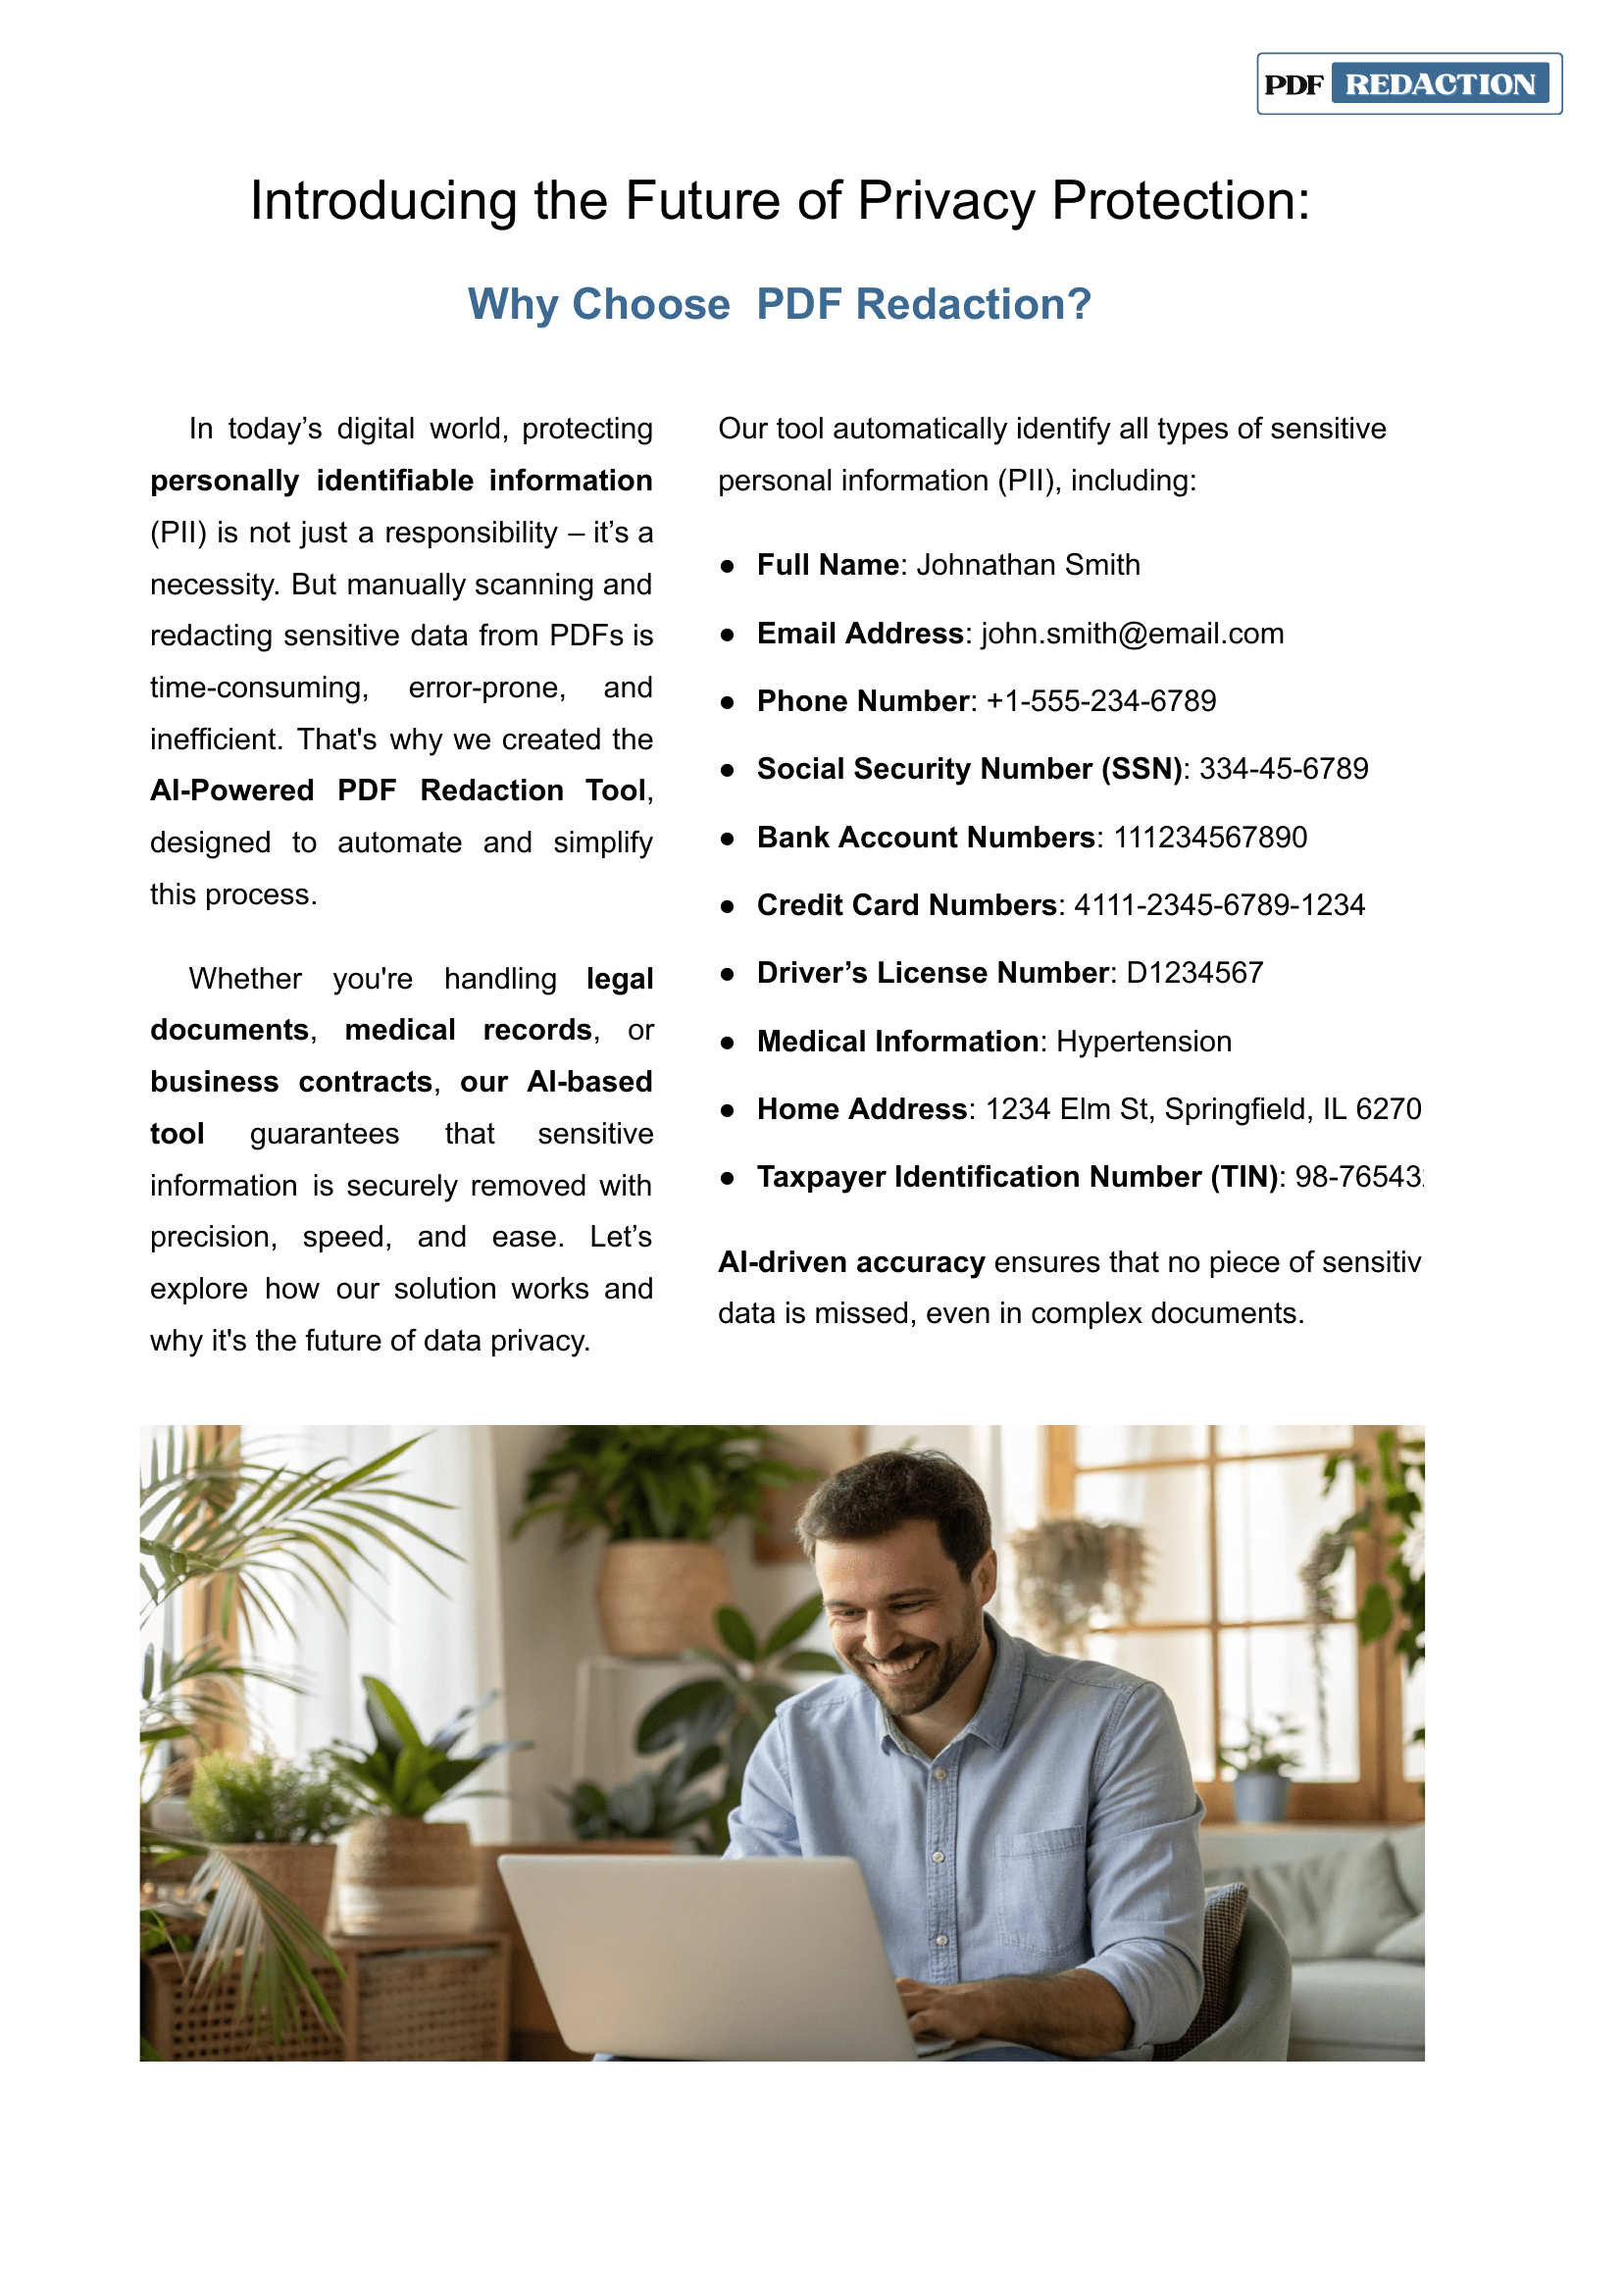

In [1]:
from pdf2image import convert_from_path
from IPython.display import display

# File path to your PDF (replace with your actual file path)
file_path = "./sample_document_en.pdf"
# or use local file from example folder
#file_path = "../examples/pdfs/sample_document_en.pdf"

def display_pdf(pdf_path):
    """Display first page of the pdf file"""
    # Convert first page of PDF to image
    pages = convert_from_path(pdf_path, first_page=1, last_page=1)  # returns a list of PIL Images

    # Display first page
    display(pages[0])

display_pdf(file_path)

# Redact PDF using API

In [17]:
import requests
from pathlib import Path
import base64
import json

api_url = "https://api.pdf-redaction.com/api/anonymize/pdf"

# Create output directory path
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)  # Create output directory if it doesn't exist

# Compute output file name based on input file name
input_file = Path(file_path)
output_file_path = output_dir / f"redacted_{input_file.name}"

headers = {
    "accept": "application/pdf"
}

# Read the PDF file and send it to the API
with open(file_path, "rb") as f:
    pdf_decoded = base64.b64encode(f.read()).decode("utf-8")
    response = requests.post(api_url, headers=headers, json={"pdf": pdf_decoded})

print("Status code:", response.status_code)

# Save the redacted PDF to a file
if response.status_code == 200:
    result = response.json()

    pdf_data = result["pdf"].encode()
    content = base64.b64decode(pdf_data)

    with open(output_file_path, "wb") as out:
        out.write(content)
    print(f"Redacted PDF saved as '{output_file_path}'.")
else:
    print("Error:", response.json())

Status code: 200
Redacted PDF saved as 'output/redacted_sample_document_en.pdf'.


## Display processing time

In [18]:
print(json.dumps(result['processing_time'], indent=4))

{
    "total": 3.2438008785247803,
    "stages": {
        "PdfDataToSingleImage": 0.5372748374938965,
        "PdfDataToDocument": 0.003601551055908203,
        "Ocr": 0.0004470348358154297,
        "Ner": 2.092083215713501,
        "ImageDrawBoxes": 0.5175251960754395,
        "SingleImageToPdf": 0.0920565128326416
    }
}


## Display detected PII

In [16]:
print(json.dumps(result['detected_pii'], indent=4))

{
    "path": "memory",
    "entities": [
        {
            "entity_group": "PERSON_NAME",
            "score": 0.0,
            "word": "Johnathan Smith",
            "start": 0,
            "end": 0,
            "boxes": [
                {
                    "text": "Johnathan",
                    "score": 1.0,
                    "x": 1402,
                    "y": 838,
                    "width": 213,
                    "height": 51
                },
                {
                    "text": "Smith",
                    "score": 1.0,
                    "x": 1628,
                    "y": 838,
                    "width": 117,
                    "height": 51
                }
            ]
        },
        {
            "entity_group": "EMAIL",
            "score": 0.0,
            "word": "john.smith@email.com",
            "start": 0,
            "end": 0,
            "boxes": [
                {
                    "text": "john.smith@email.com",
               

## Display redacted PDF

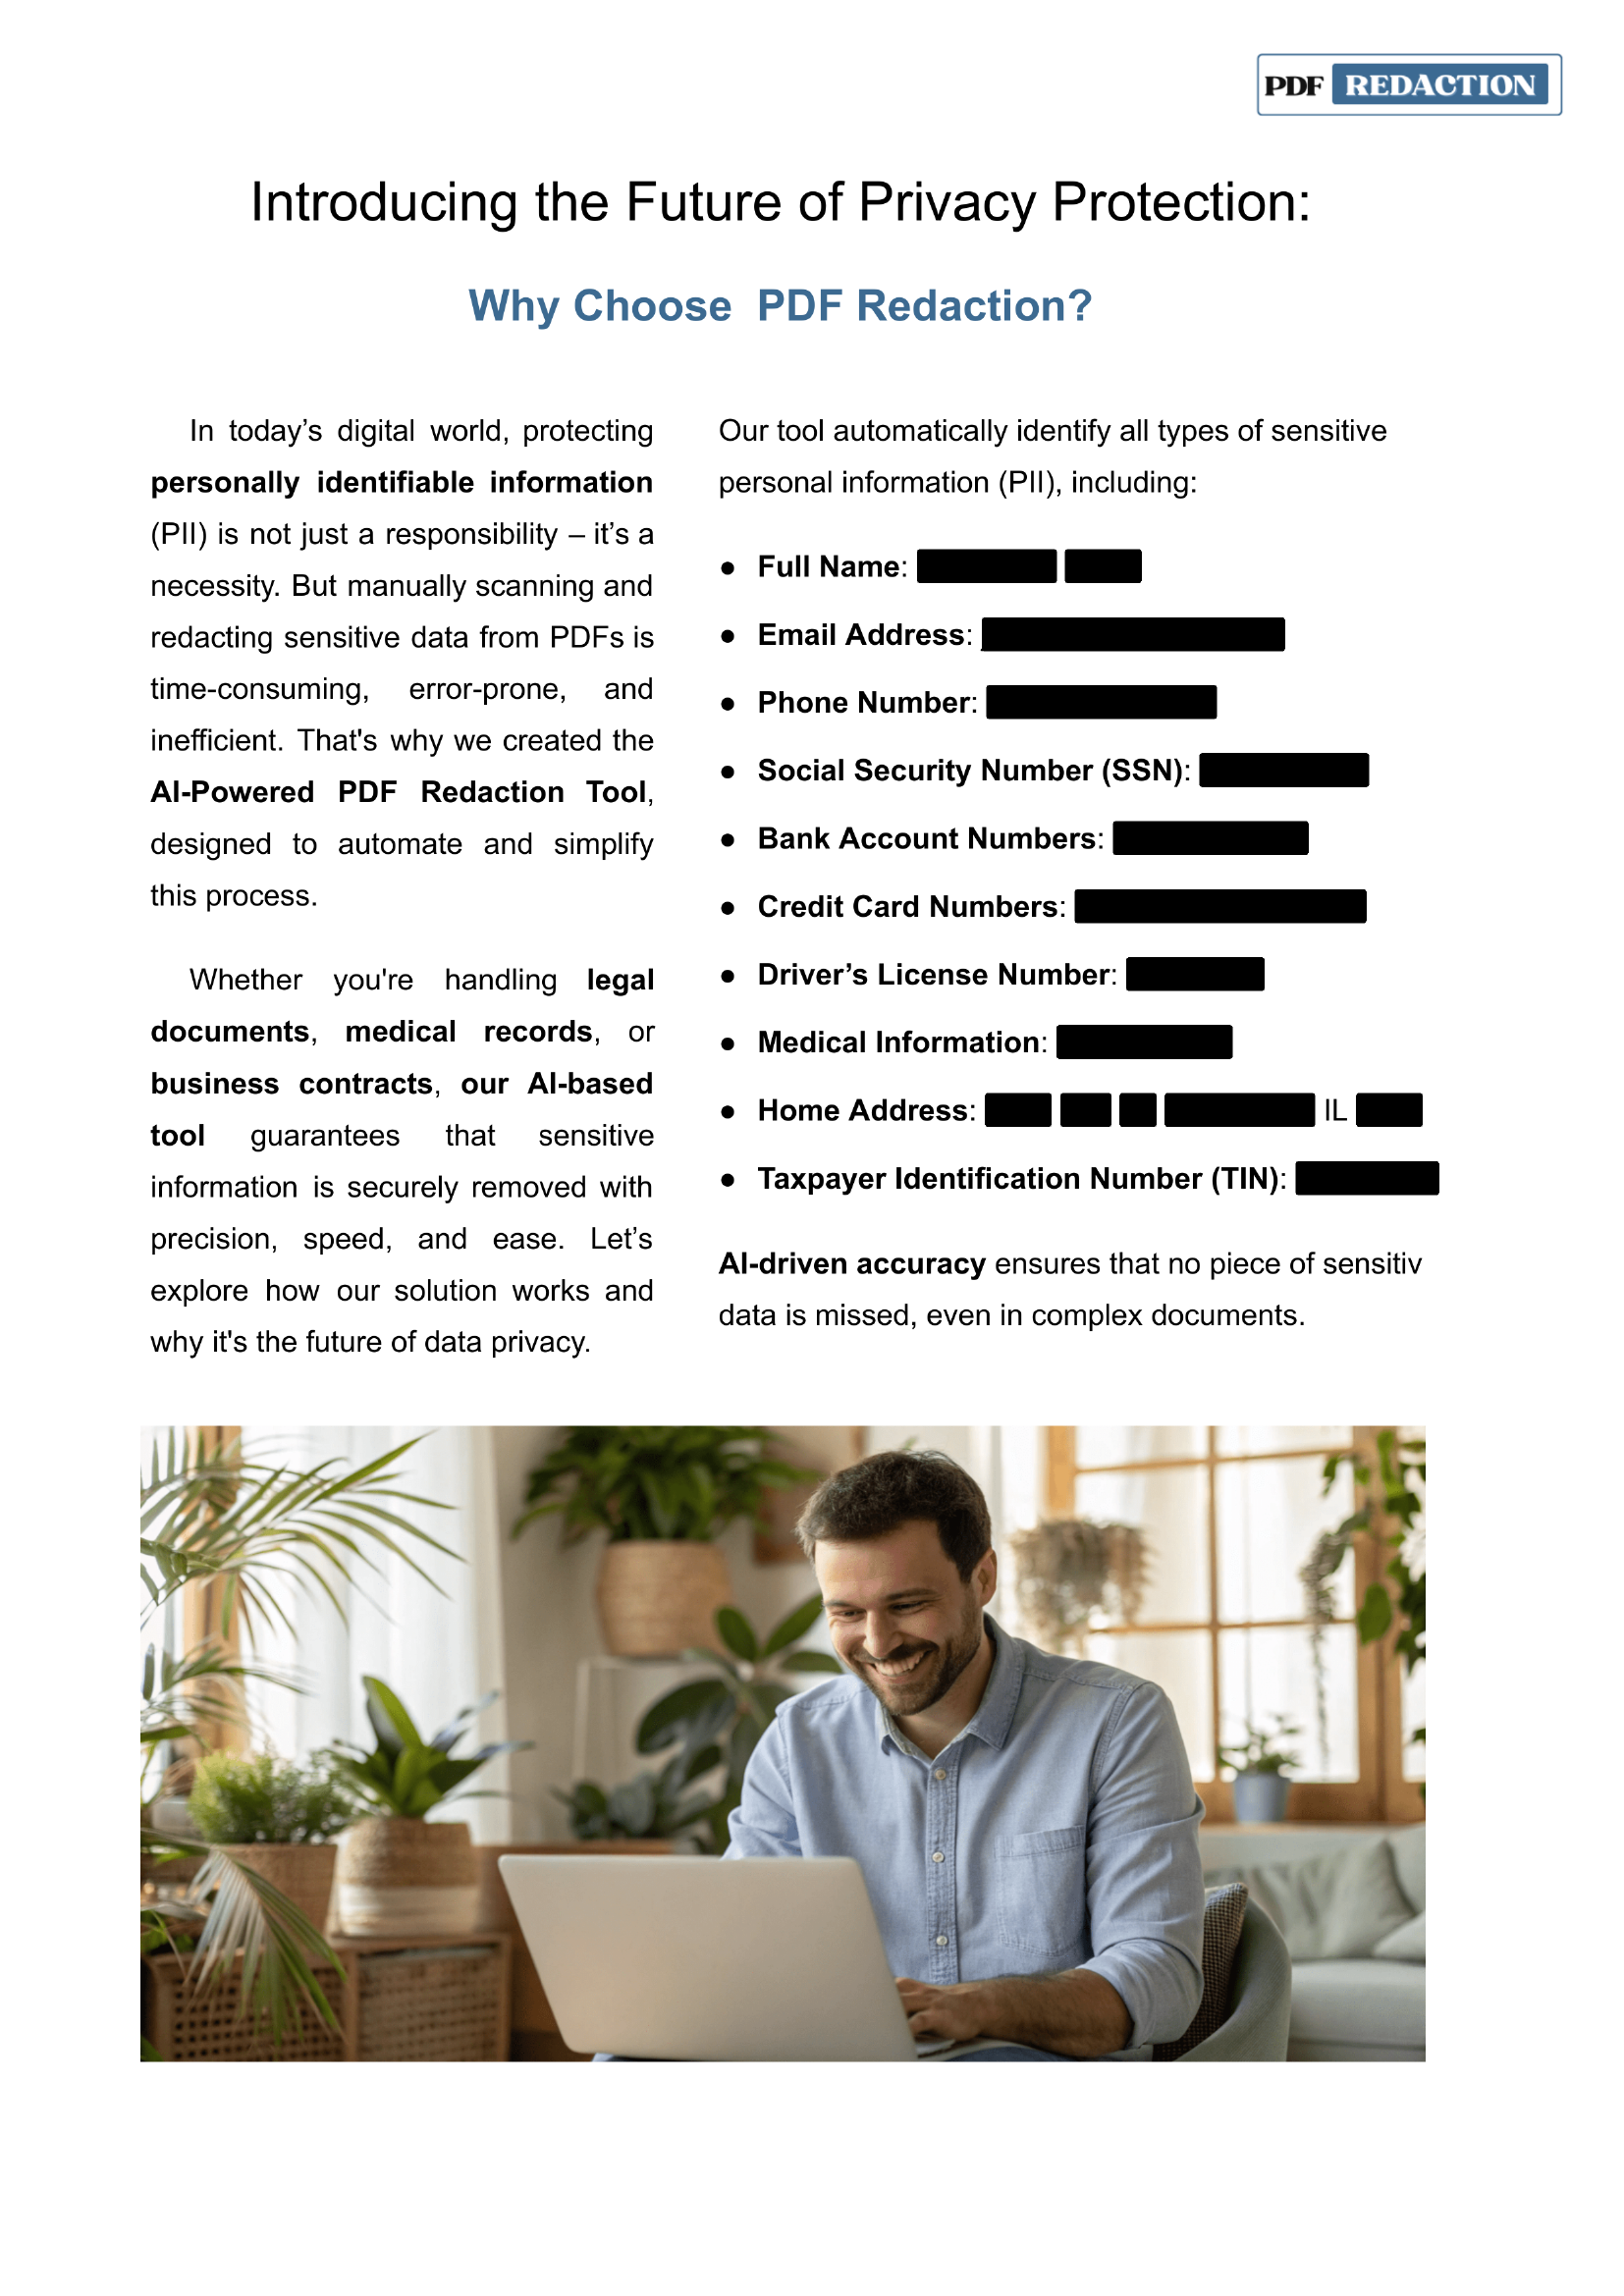

In [5]:
display_pdf(output_file_path)